# Time Series Forcasting of Stock Market Data with ARIMA in Python
Author: [M. Zohaib Zeeshan](https://www.kaggle.com/mzohaibzeeshan)<br>
Date: 18.11.25

[My Kaggle Profile](https://www.kaggle.com/mzohaibzeeshan)<br>
[My Facebook Profile](https://www.kaggle.com/mzohaibzeeshan)<br>

![my image](https://dynaimage.cdn.cnn.com/cnn/c_fill,g_auto,w_1200,h_675,ar_16:9/https%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F220718124741-google-alphabet-stock-split.jpg)

## Stock Market Data scraping in Python

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
from datetime import datetime

# Define the desired date range
start_date = '2022-06-24'
end_date = '2023-06-24'

# Convert strings to date objects for further use, if needed
start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
end_date_obj = datetime.strptime(end_date, '%Y-%m-%d')

In [3]:
print('Our data will be between these dates', start_date,'to', end_date)  # Defining the dates of our data

Our data will be between these dates 2022-06-24 to 2023-06-24


In [4]:
# Define the ticker
ticker = 'GOOGL'
df = yf.download(ticker, start = start_date, end = end_date, progress=False)
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-06-24  112.995003  118.079002  112.952499  117.974998  117.548874   
2022-06-27  118.273003  118.579498  115.179497  115.833504  115.415108   
2022-06-28  115.802498  117.309502  111.848000  112.007500  111.602928   
2022-06-29  111.552002  113.160500  110.872498  111.701500  111.298035   
2022-06-30  110.000000  110.888000  106.750000  108.962997  108.569420   

              Volume  
Date                  
2022-06-24  41164000  
2022-06-27  36420000  
2022-06-28  35792000  
2022-06-29  24716000  
2022-06-30  43170000

In [5]:
# Remove multi-level columns (e.g., duplicate 'GOOGL' headers)
#df.columns = df.columns.droplevel(1)  # Drop the top level of the column index
df.columns.name = None # Remove the 'Price' label for our data 
# Format the Date index to keep only the date
df.index = df.index.strftime('%Y-%m-%d')  # Formats index as 'YYYY-MM-DD'

In [6]:
df.info() # Getting the information of the data

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2022-06-24 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


In [7]:
# Step 1: Copy the index to a new column named 'Date'
df['Date'] = df.index

# Step 2: Reset the index, dropping the current index and replacing it with a default integer-based index
df.reset_index(drop=True, inplace=True)

In [8]:
df.columns # Checking the columns as an array

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date'], dtype='object')

In [9]:
# Changing the sequence of the columns
df = df[[ 'Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]

In [10]:
df.head() # Our data is now all set

Date   Adj Close       Close        High         Low        Open  \
0  2022-06-24  117.548874  117.974998  118.079002  112.952499  112.995003   
1  2022-06-27  115.415108  115.833504  118.579498  115.179497  118.273003   
2  2022-06-28  111.602928  112.007500  117.309502  111.848000  115.802498   
3  2022-06-29  111.298035  111.701500  113.160500  110.872498  111.552002   
4  2022-06-30  108.569420  108.962997  110.888000  106.750000  110.000000   

     Volume  
0  41164000  
1  36420000  
2  35792000  
3  24716000  
4  43170000

In [11]:
# Selecting columns to be used
df = df[['Date', 'Close']]
df.head()

Date       Close
0  2022-06-24  117.974998
1  2022-06-27  115.833504
2  2022-06-28  112.007500
3  2022-06-29  111.701500
4  2022-06-30  108.962997

In [12]:
# ploting the data using plotly 
fig = px.line(df, x='Date', y='Close', title='Stock Price Over Time')
fig.show()

In [13]:
# ADF Test

def adf_test(df): # Define the ADF test function
    result = adfuller(df) # Perform the ADF test
    print('ADF Statistic: %f' % result[0]) # Print the ADF statistic
    print('p-value: %f' % result[1]) # Print the p-value
    if result[1] <= 0.05: # Check if p-value is less than or equal to 0.05
        print('Reject null hypothesis, data is stationary') # Reject null hypothesis if p-value is <= 0.05
    else: # If p-value is greater than 0.05
        print('Fail to reject null hypothesis, data is non-stationary') # Fail to reject null hypothesis if p-value > 0.05

adf_test(df['Close']) # Call the ADF test function on the 'Close' column of df


ADF Statistic: -1.554810
p-value: 0.506244
Fail to reject null hypothesis, data is non-stationary


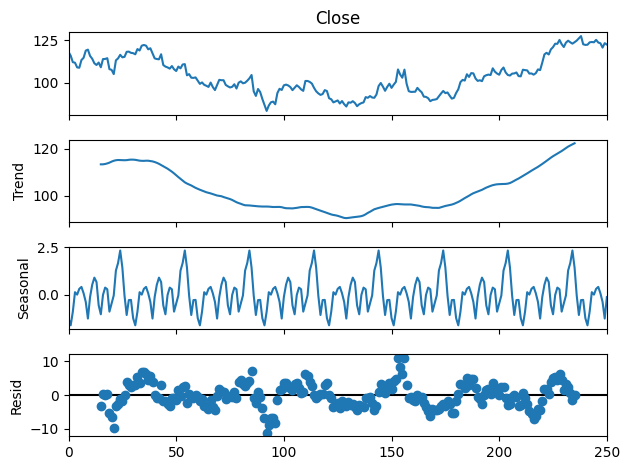

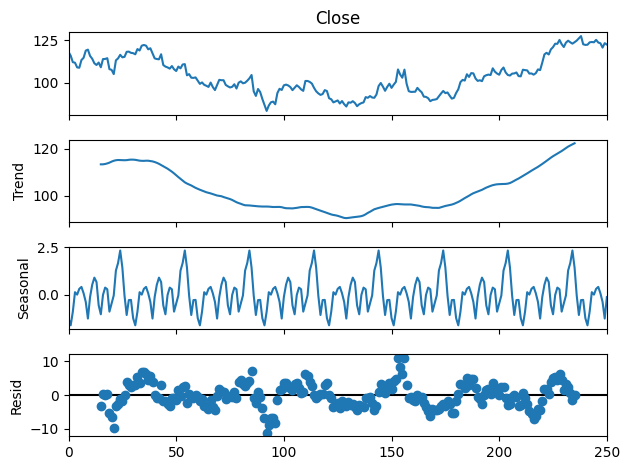

In [14]:
# Decompose the data to see the trend, seasonality and residuals
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

### Finding the <span style="color: #FFCC33;">d</span> value.

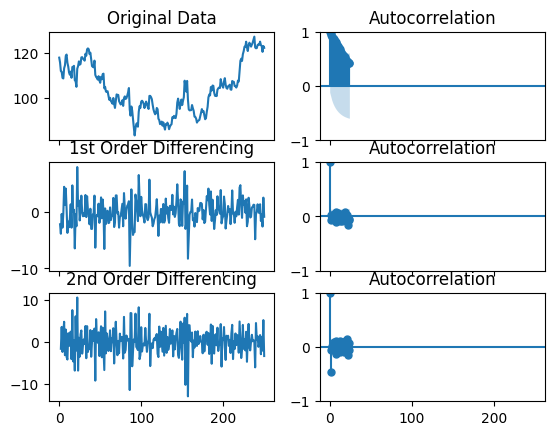

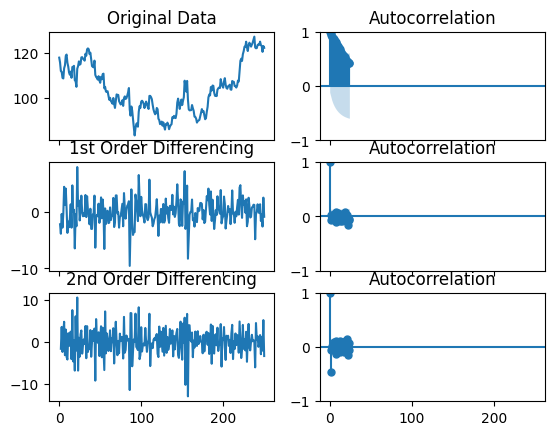

In [15]:
from statsmodels.graphics.tsaplots import plot_acf # Import the plot_acf function

fig, axes = plt.subplots(3, 2, sharex=True) # Create a 3x2 subplot with shared x-axis

axes[0, 0].plot(df['Close']) # Plot the original data on the first subbplot
axes[0, 0].set_title('Original Data') # Set title for the original data plot
plot_acf(df['Close'], ax=axes[0, 1]) # Plot the ACF for the original data

axes[1, 0].plot(df['Close'].diff()) # Plot the 1st order differenced data on the second subplot
axes[1, 0].set_title('1st Order Differencing') # Set title for the 1st order differencing plot
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1]) # Plot the ACF for the 1st order differenced data

axes[2, 0].plot(df['Close'].diff().diff()) # Plot the 2nd order differenced data on the third subplot
axes[2, 0].set_title('2nd Order Differencing') # Set title for the 2nd order differencinsg plot
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1]) # Plot the ACF for the 2nd order differenced data


### <span style="color: #FFCC33;">d = 1</span>

### Finding the <span style="color: #FFCC33;">p</span> value

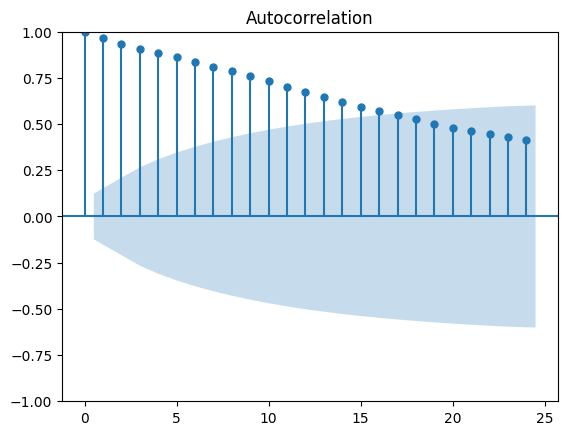

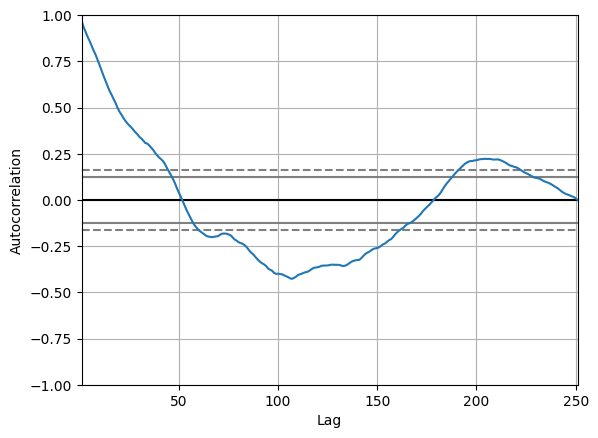

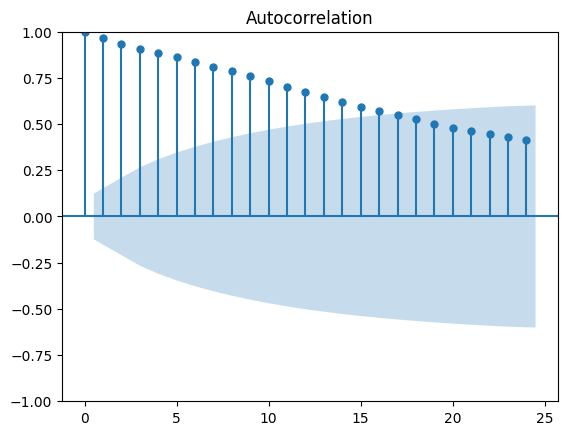

In [16]:
# AutoCorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])

plot_acf(df['Close'], alpha=0.05)

In [17]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.967680
2   0.934869
3   0.908629
4   0.882970
5   0.860408
6   0.834713
7   0.808552
8   0.786573
9   0.759204
10  0.730694
11  0.700909
12  0.672313
13  0.645865
14  0.618340
15  0.591556
16  0.570855
17  0.548070
18  0.526802
19  0.500679
20  0.478966
21  0.462213
22  0.444280
23  0.428058


### <span style="color: #FFCC33;">p = 2</span>

### Finding the <span style="color: #FFCC33;">q</span> value

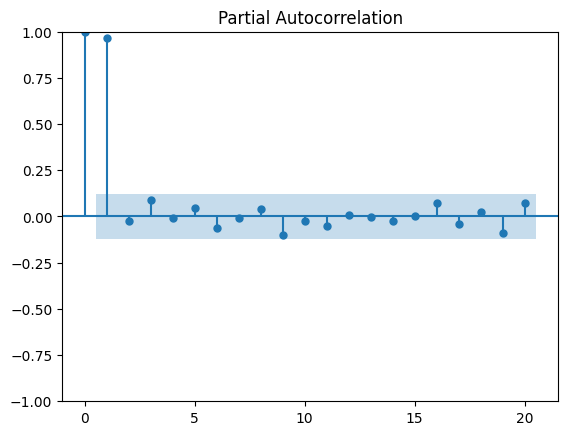

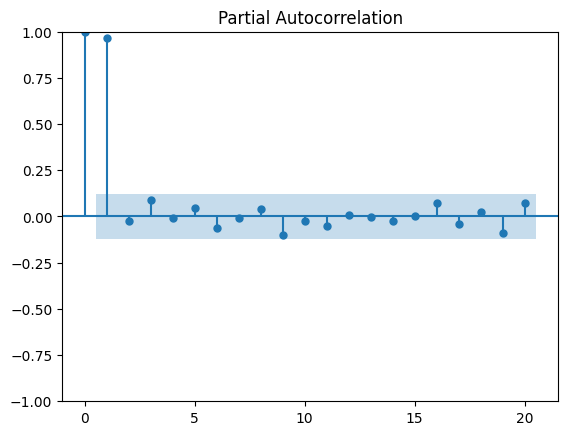

In [18]:
# Partial auto correlation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

### <span style="color: #FFCC33;">q = 2</span>


In [19]:
# Defining the p, d, q values 
p = 2
d = 1
q = 2

#### **Using auto_arima to fit an ARIMA model on the 'Close' column of the DataFrame.**
- `start_p:` Minimum value for the AR term (p) to test.
- `start_q:` Minimum value for the MA term (q) to test.
- `max_p:` Maximum value for the AR term (p) to test.
- `max_q:` Maximum value for the MA term (q) to test.
- `m:` Number of periods in a seasonal cycle (e.g., 12 for monthly data with yearly seasonality).
- `start_P:` Minimum value for the seasonal AR term (P) to test.
- `seasonal:` Enables the seasonal ARIMA model.
- `d:` Differencing order for the non-seasonal component.
- `D:` Differencing order for the seasonal component.
- `trace:` If True, outputs details of the model selection process to the console.
- `error_action:` Specifies how to handle errors ('ignore' skips problematic configurations).
- `suppress_warnings:` Suppresses warnings during the model fitting process.

In [20]:
!pip install pmdarima

# Running the ARIMA with PMDARIMA
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.4 MB/s eta 0:00:0000:0100:01
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1273.083, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1211.308, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1275.083, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1177.029, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1175.030, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1209.532, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1177.029, Time=0.34 sec
 ARIMA(1,1,1)(2,1,0)[12]     

In [21]:
# Summary of the model `ARIMA(0,1,0)(2,1,0)[12]`    
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -582.114
Date:                             Thu, 19 Dec 2024   AIC                           1174.228
Time:                                     16:54:41   BIC                           1191.590
Sample:                                          0   HQIC                          1181.225
                                             - 251                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9116      0.059     15.522      0.000       0.797       1.027
ma.L1         -0.9735      

In [22]:
# Stats model and applying arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()

# print(model.summary())

# Predict the next 30 days
forecast = model.predict(len(df['Close']), len(df['Close'])+30)
# print(forecast)

# plot forecast
# plt.figure(figsize=(10, 5))
# plt.plot(df['Close'], label='Actual')
# plt.plot(forecast, label='forecast')

### As ARIMA is not giving satisfactory results, I need to apply SARIMA model

In [ ]:
# Running with SARIMA
import statsmodels.api as sm
import warnings

p, d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [ ]:
# Predictions
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+30)

# plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(predictions, label='predictions')

<div style="text-align: center; font-family: 'Brush Script MT', cursive; font-size: 25px; color:rgb(228, 186, 0);">
    <b>This concludes the process of applying ARIMA and SARIMAX models on the Google Stock Market Data.</b>
</div>